In [1]:
import sys
import utm
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import context
from utils import *
import PyPL

local start: [  0. -30.]
local end: [-30. -40.]
zone number: 15, zone_letter: T


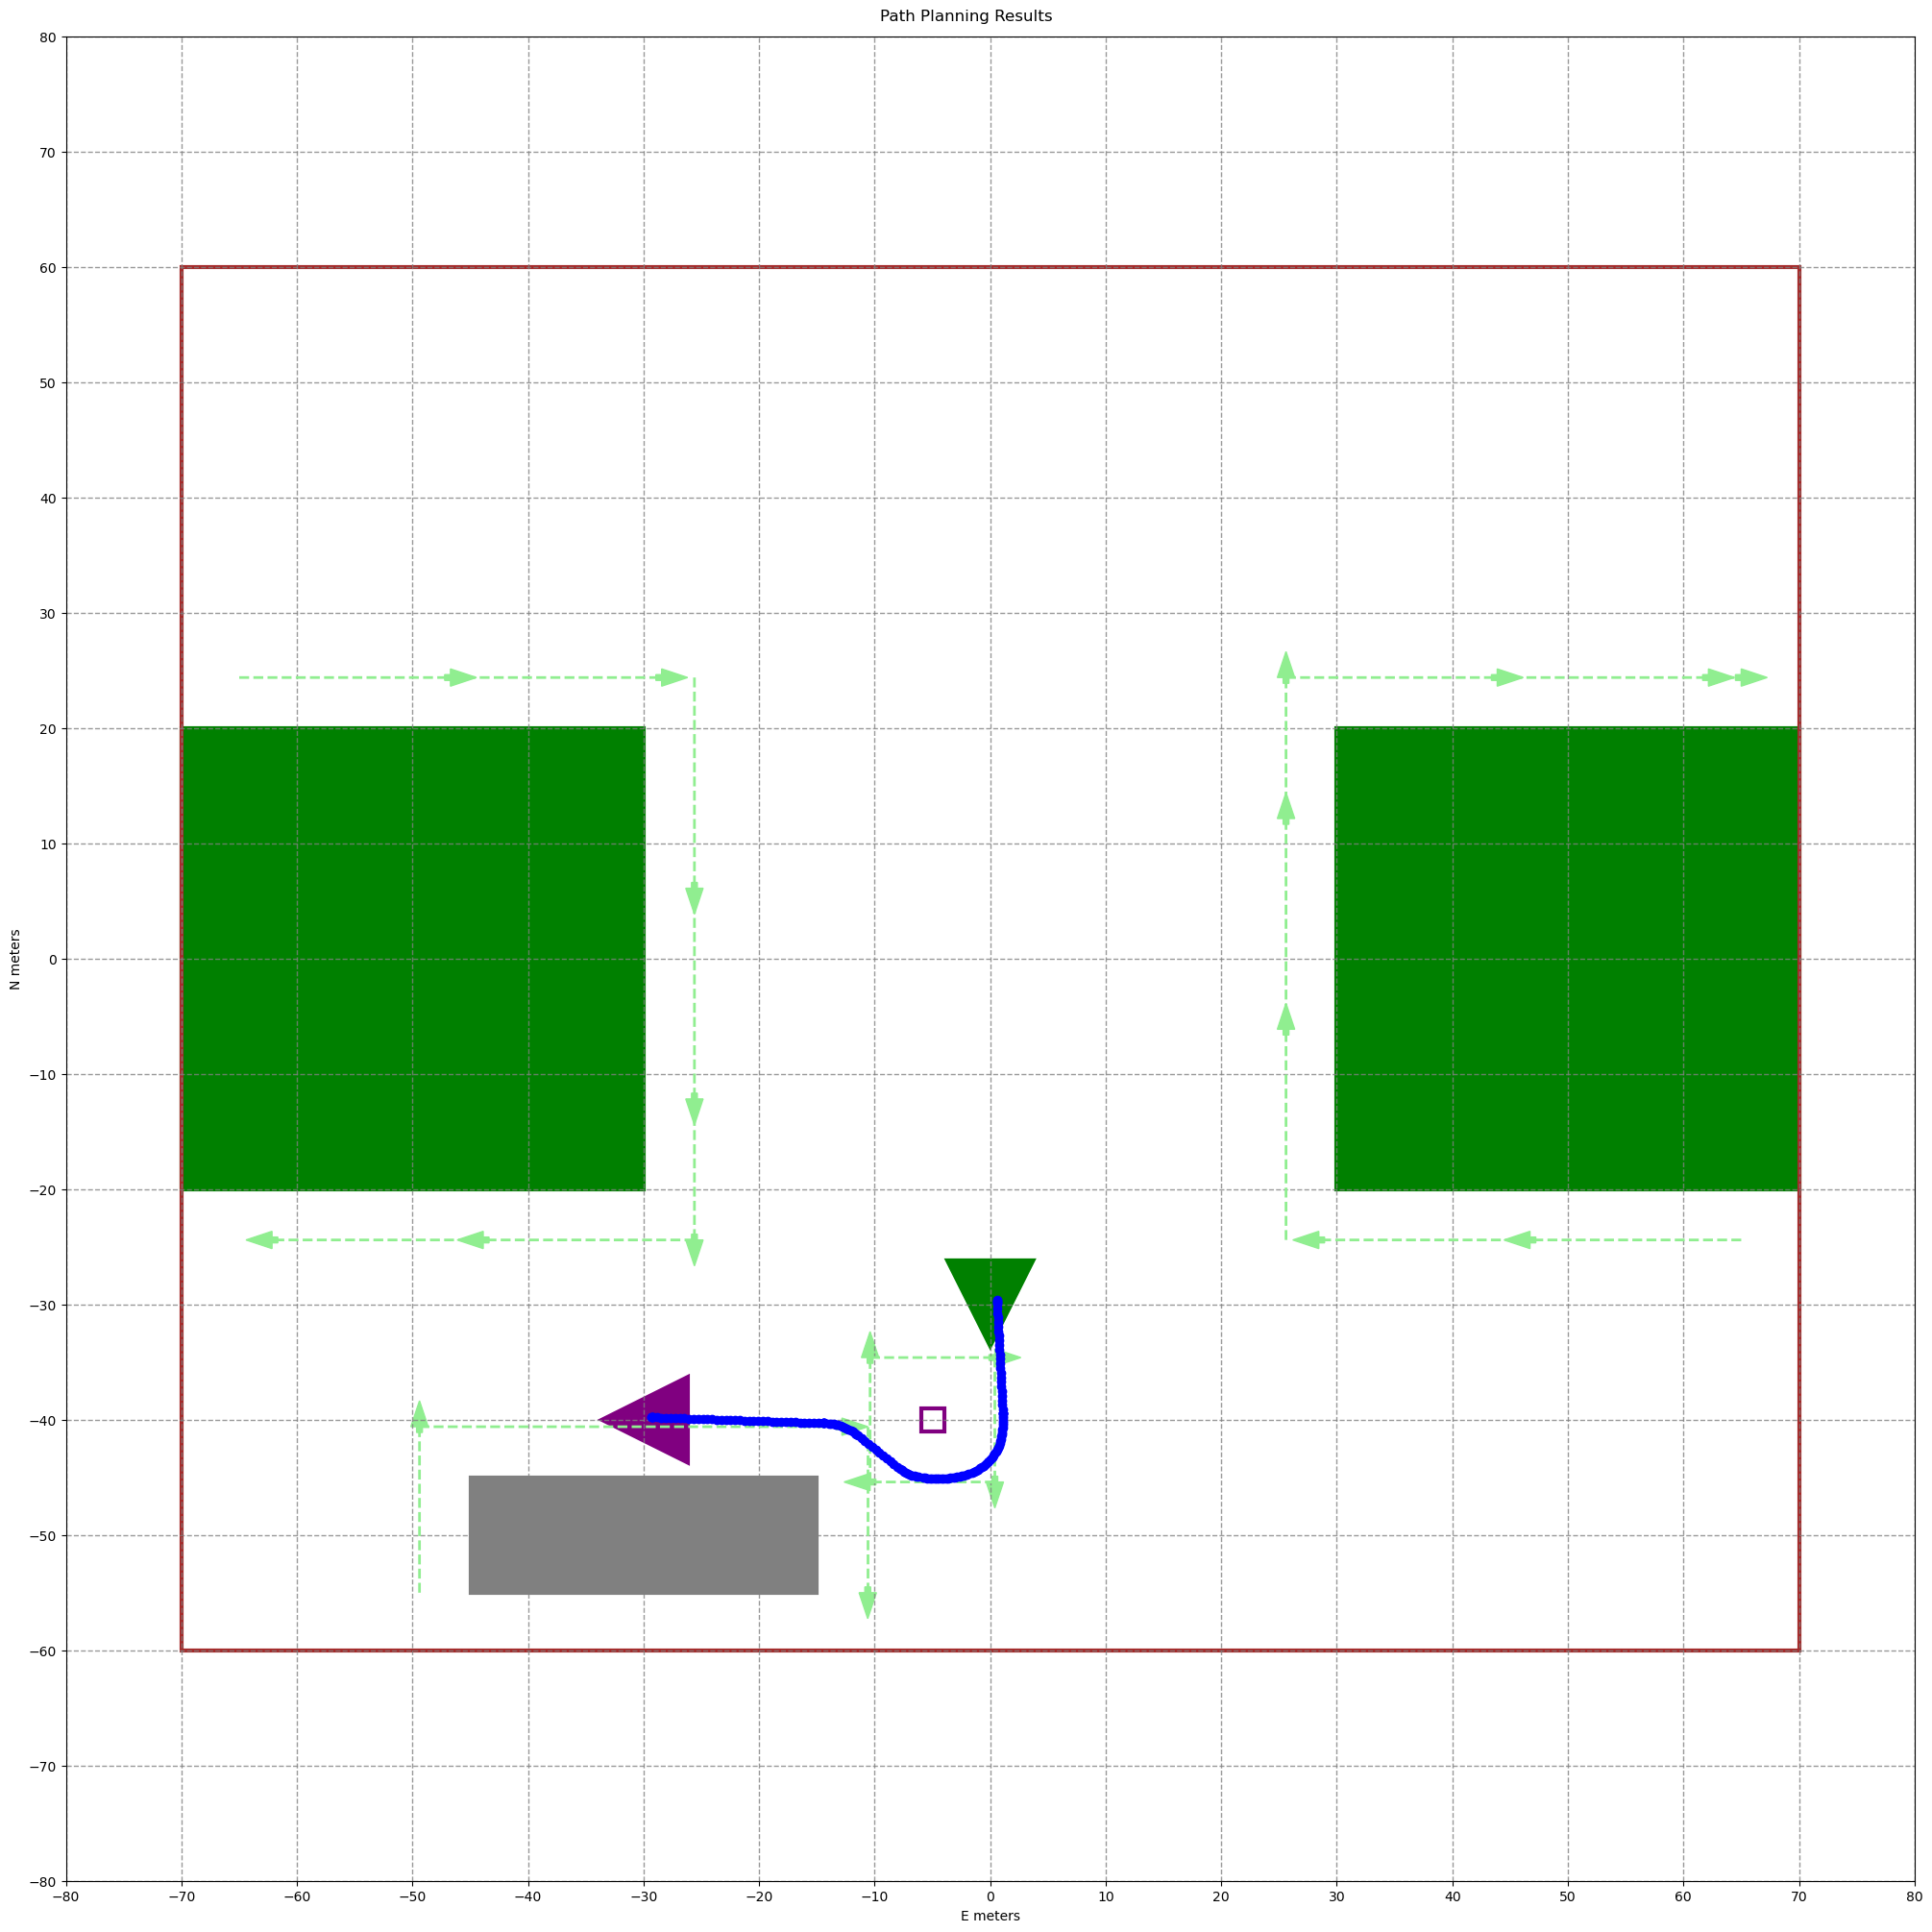

In [2]:
# Planning Scenerio 3.1
# Description: Returning to the unload to semi position from a lane
# Case:  Obstacle on curve
track_spacing = 10.0
in_ground_turning_radius = 6.0
vehicle_width = 0.8 * track_spacing
implement_width = 0.8 * track_spacing
work_heading = 0.0 #90.0boundaries_plot_attributes
planning_strategy = PyPL.PlanningStrategy.ExistingTrack
obstacles_buffer = 0.0 # Described as ExtraBuffer, the effects of this parameter arent't well understood
''' 
Options for environment_inputs.Strategy are listed below
    SnapToBoundary, # Appears to produce results similar to "ExistingTrack"
    BestFitSnapToBoundary, # Causes the plannig library to crash
    HeadingOnly,
    ExistingTrack
'''
origin_latlon = (41.74850266356132, -93.53101140091728)
origin_easting, origin_northing, zone_number, zone_letter = utm.from_latlon(origin_latlon[0], origin_latlon[1])
origin_xy = np.asarray([origin_easting, origin_northing])

# Path inputs
start_xy = origin_xy + np.asarray([0.0, -3.0 * track_spacing])
end_xy = origin_xy + np.asarray([-3.0 * track_spacing, -4.0 * track_spacing])
print('local start: {}'.format(str(start_xy - origin_xy)))
print('local end: {}'.format(str(end_xy - origin_xy)))

start_pose_2d = Pose2D(start_xy, 270.0, zone_number, zone_letter)
goal_pose_2d = Pose2D(end_xy, 180.0, zone_number, zone_letter)

# Building obstacles
obstacles_plot_attributes = {'edgecolor':'green',
                               'linewidth': 3,
                               'facecolor': 'green'}
obstacles = [
    Box2D.create_box(origin_xy + np.asarray([-5.0 * track_spacing, 0]),  4.0 * track_spacing, 4.0* track_spacing, **obstacles_plot_attributes),
    Box2D.create_box(origin_xy + np.asarray([5.0 * track_spacing, 0]),  4.0 * track_spacing, 4.0* track_spacing, **obstacles_plot_attributes),
]
padding = [0.0, 40.0]
boundaries_plot_attributes = {'edgecolor':'brown'}
boundaries = [Box2D.compute_bounding_box(obstacles, padding, **boundaries_plot_attributes)]

# Adding semi as obstacle
obstacles.append(Box2D.create_box(origin_xy + np.asarray([-3.0 * track_spacing, -5.0 * track_spacing]), 30.0, 10.0,
                                  facecolor = 'gray', edgecolor= 'gray'))

# Adding small obstacle in front of machine
obstacles.append(Box2D.create_box(origin_xy + np.asarray([-0.5 * track_spacing, -4.0 * track_spacing]), 2.0, 2.0))

environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy,
                                      obstacles_buffer)
print('zone number: {}, zone_letter: {}'.format(zone_number, zone_letter))    

plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints,
                                 plan_results,
                                 output_path_offset,
                                 np.arange(-80, 81, track_spacing),
                                 implement_width,
                                 implement_width)

local start: [  0. -30.]
local end: [-30. -40.]
zone number: 15, zone_letter: T


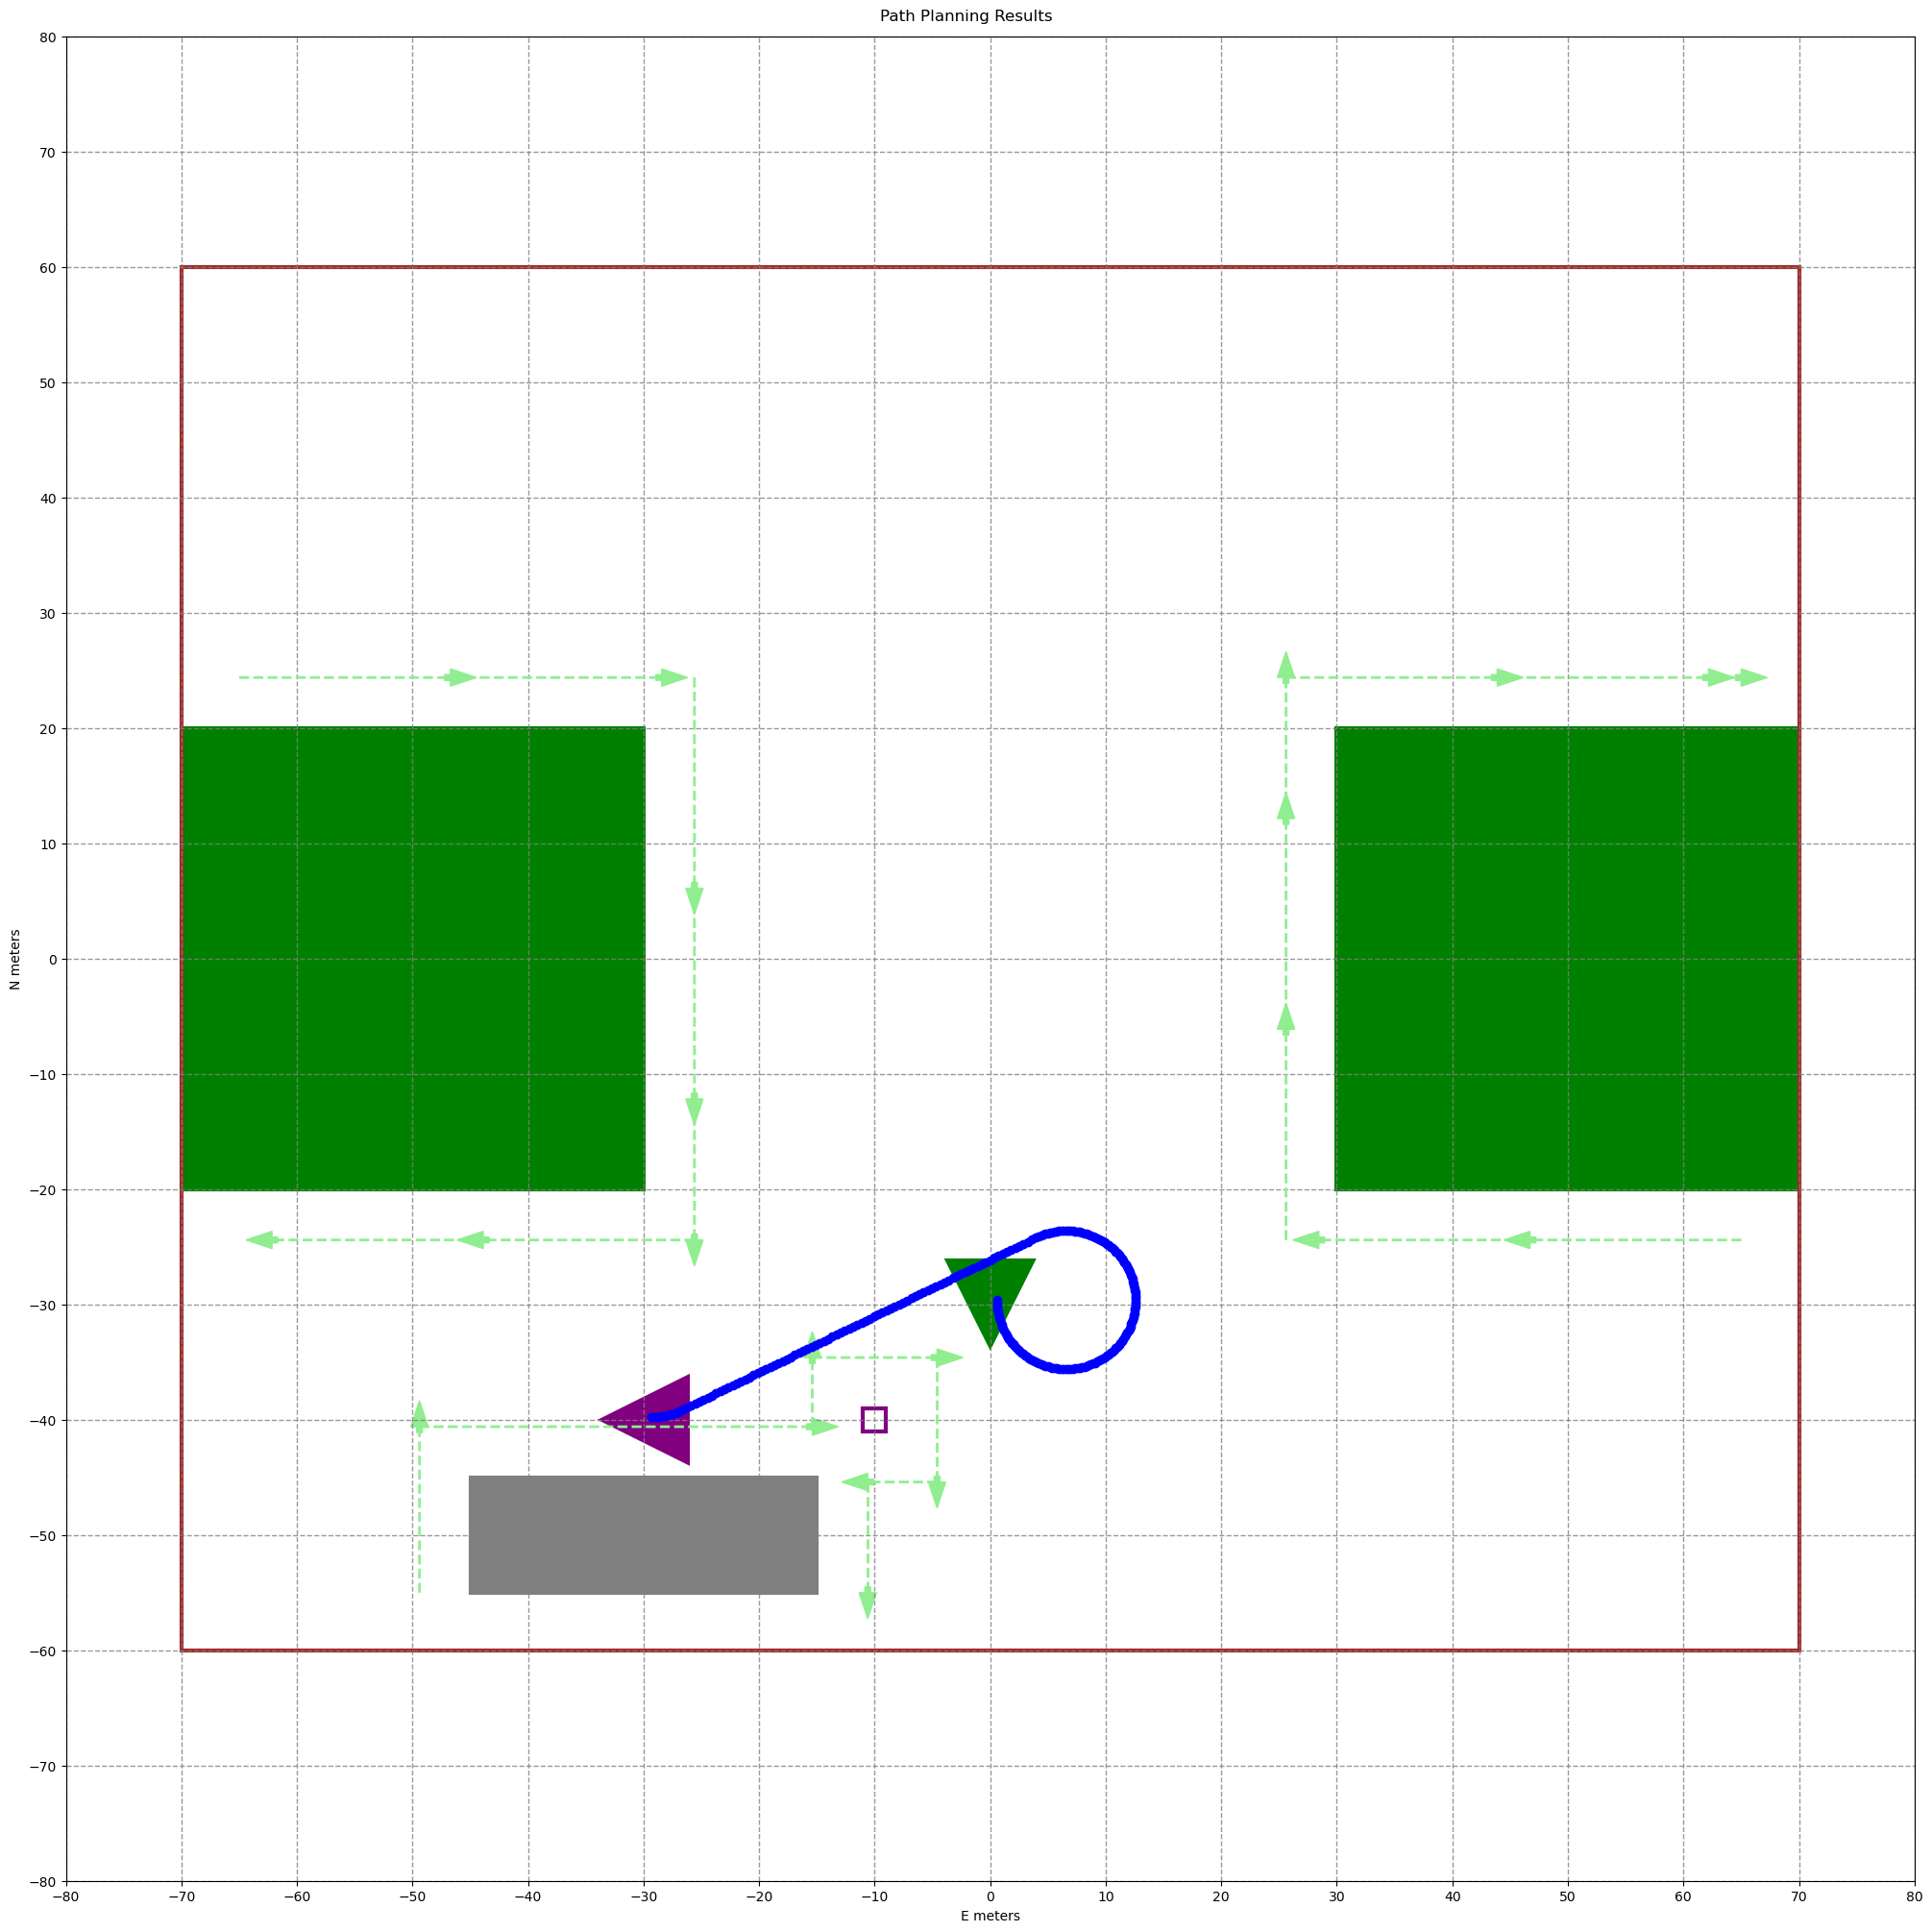

In [3]:
# Planning Scenerio 3.1
# Description: Returning to the unload to semi position from a lane
# Case:  Obstacle on curve     

# Path inputs
start_xy = origin_xy + np.asarray([0.0, -3.0 * track_spacing])
end_xy = origin_xy + np.asarray([-3.0 * track_spacing, -4.0 * track_spacing])
print('local start: {}'.format(str(start_xy - origin_xy)))
print('local end: {}'.format(str(end_xy - origin_xy)))

start_pose_2d = Pose2D(start_xy, 270.0, zone_number, zone_letter)
goal_pose_2d = Pose2D(end_xy, 180.0, zone_number, zone_letter)

obstacles = [
    Box2D.create_box(origin_xy + np.asarray([-5.0 * track_spacing, 0]),  4.0 * track_spacing, 4.0* track_spacing, **obstacles_plot_attributes),
    Box2D.create_box(origin_xy + np.asarray([5.0 * track_spacing, 0]),  4.0 * track_spacing, 4.0* track_spacing, **obstacles_plot_attributes),
]
padding = [0.0, 40.0]
boundaries_plot_attributes = {'edgecolor':'brown'}
boundaries = [Box2D.compute_bounding_box(obstacles, padding, **boundaries_plot_attributes)]

# Adding semi as obstacle
obstacles.append(Box2D.create_box(origin_xy + np.asarray([-3.0 * track_spacing, -5.0 * track_spacing]), 30.0, 10.0,
                                  facecolor = 'gray', edgecolor= 'gray'))

# Adding small obstacle in front of machine
obstacles.append(Box2D.create_box(origin_xy + np.asarray([-1.0 * track_spacing, -4.0 * track_spacing]), 2.0, 2.0))

environment_objects = EnvironmentObjects(obstacles, boundaries, [])
plan_constraints = build_planning_env(origin_xy, zone_number, zone_letter,
                                      environment_objects,
                                      track_spacing,
                                      in_ground_turning_radius,
                                      vehicle_width,
                                      implement_width,
                                      work_heading,
                                      planning_strategy,
                                      obstacles_buffer)
print('zone number: {}, zone_letter: {}'.format(zone_number, zone_letter))    

plan_results = generate_open_field_path((start_pose_2d, goal_pose_2d), plan_constraints)
output_path_offset = boundaries[0].top_left - origin_xy
fig, axs = plot_planning_results(plan_constraints,
                                 plan_results,
                                 output_path_offset,
                                 np.arange(-80, 81, track_spacing),
                                 implement_width,
                                 implement_width)